In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs #used to generate a dataset based on sample size,features and generate clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # bec it is distance based algo
import warnings
warnings.filterwarnings('ignore')

In [2]:
 X, y_true= make_blobs(n_samples=500, centers=3, cluster_std=0.60,random_state=42)

In [3]:
df= pd.DataFrame(X,columns=['Feature_1','Feature_2'])

In [4]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


# Standard Scaling

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Elbow Method
now lets use elbow method to determine no of k values needed
first capture WCSS(WIthin Cluster Sum Of Square Distance) aka inertia

In [6]:
inertia = []    # WCSS
K_range = range(1,11)    # 1 se 11 clusters ko test krenge to see the elbow curve in elbow method

# K-Means Clustering

In [7]:
for k in K_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [8]:
inertia

[1000.0,
 297.8954141051723,
 11.57548472310498,
 9.752067977356841,
 8.257175272446284,
 6.9175773204168,
 6.334755391595291,
 5.704177177901429,
 5.060234133532076,
 4.762361898130396]

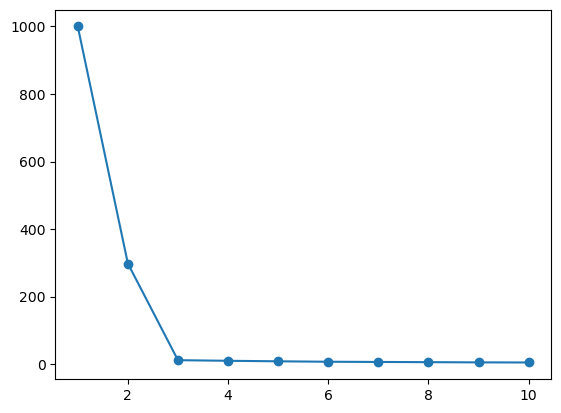

In [9]:
plt.plot(K_range,inertia,marker='o')

best point look at point 3

In [10]:
Kmeans_final = KMeans(n_clusters=3,random_state=42)

In [11]:
cluster_labels = Kmeans_final.fit_predict(X_scaled)  # ye labels ke liye

In [12]:
cluster_labels

array([1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2,
       2, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0,

now we will make a scatter plot out of it

In [13]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

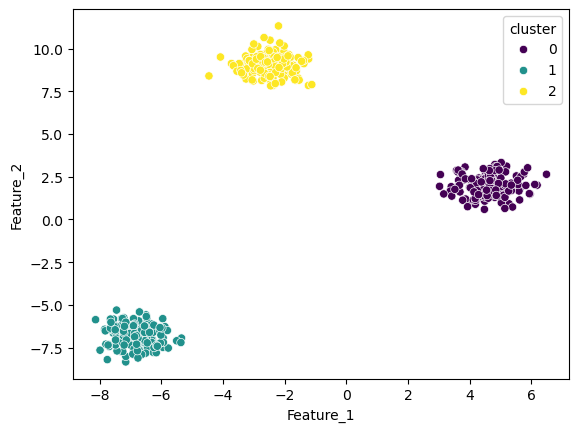

In [14]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['cluster'],palette='viridis')

# DBSCAN 

we'll take a new dataset - makemoons

In [17]:
from sklearn.datasets import make_moons

In [18]:
 X, y_true = make_moons(n_samples=500, noise=0.05, random_state=42)

In [19]:
from sklearn.cluster import KMeans,DBSCAN

In [20]:
df= pd.DataFrame(X,columns=['Feature_1','Feature_2'])

## Standard Scaling

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

## Doing KMeans for this make_moons dataset

In [23]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [24]:
df['kmeans_cluster']=kmeans_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

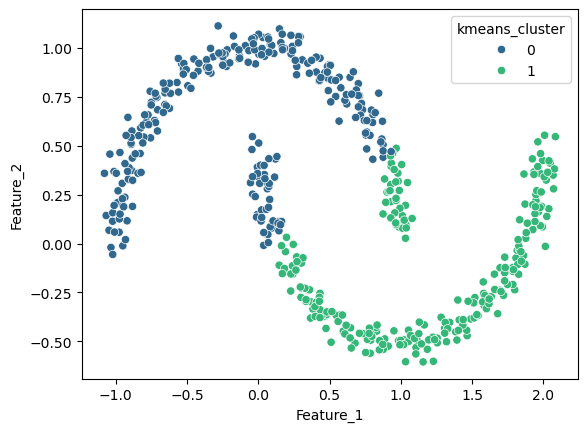

In [26]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['kmeans_cluster'],palette='viridis')

PROBLEM - edhar par clusters galat ban gaye aur merge type ke ho gye which is main issue in KMeans which lacks in non circular data

## Doing DBSCAN for this dataset now

we'll use epislon distance

In [27]:
dbscan = DBSCAN(eps=0.3,min_samples=5)  # min_samples - epislon 0.3 unit pr jo range banegi usme minimus 5 samples lena, aghar 5 mhi hue to hata do kyuki sab pass hai
dbsca_labels = dbscan.fit_predict(X_scaled)

In [28]:
df['dbscan_cluster'] = dbsca_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

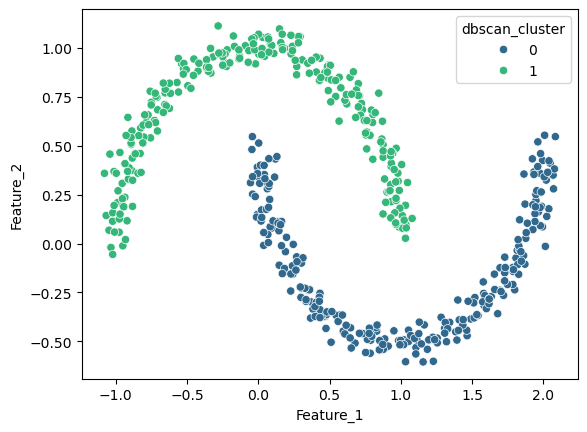

In [29]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['dbscan_cluster'],palette='viridis')